# Setup Test Population

In [5]:
from src.controller.ga import GeneticAlgorithm, GAConfig
from src.model.molecule import Molecule
from src.model.population import Population
from src.model.fitness import stability_fitness


soup = ['[C][#N]', '[C][=O]', '[C][O]', '[C][C][O]', '[C][C][=O]', '[O][=C][C][O]', '[O][=C][O]', '[N][C][=Branch1][C][=O][N]', '[N]', '[O]', '[N][C][C][=Branch1][C][=O][O]', '[C][C][Branch1][=Branch1][C][=Branch1][C][=O][O][N]', '[C][C][=Branch1][C][=O][O]', '[C][C][N]', '[C][S]', '[C][C][=Branch1][C][=O][C][=Branch1][C][=O][O]', '[C][C][=Branch1][C][=O][C]', '[O][=C][=O]', '[O][=C][=S]', '[O][P][=Branch1][C][=O][Branch1][C][O][O]']

initial = []
for s in soup:
    initial.append(Molecule(s))

# initial = [
#     Molecule("[C][C]"),
#     Molecule("[C][O]"),
#     Molecule("[O][C]")
# ]

pop = Population(initial)

# Configure GA

In [6]:
cfg = GAConfig(
    mu=5,
    lam=5,
    mutation_rate=0.4,
    crossover_rate=0.9,
    tournament_k=2,
    random_seed=0
)

ga = GeneticAlgorithm(cfg, stability_fitness)

# Evolution and History

In [7]:
history = ga.evolve(pop, generations=100)
print("Evolution done!")

Generation  0
Generation  1
Generation  2
Generation  3
Generation  4
Generation  5
Generation  6
Generation  7


[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[18:47:31] UFFTYPER: Unrecognized atom type: B_1 (2)
[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Generation  8
Generation  9
Generation  10
Generation  11
Generation  12


[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Generation  13
Generation  14
Generation  15


[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 8
[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 8
[18:47:31] UFFTYPER: Warning: hybridization set to SP3 for atom 25


Generation  16


[18:47:32] UFFTYPER: Warning: hybridization set to SP3 for atom 25


Generation  17


[18:47:32] UFFTYPER: Warning: hybridization set to SP3 for atom 35


Generation  18
Generation  19
Generation  20
Generation  21


[18:47:34] UFFTYPER: Warning: hybridization set to SP3 for atom 62
[18:47:34] UFFTYPER: Unrecognized atom type: B_ (64)


Generation  22


[18:47:38] UFFTYPER: Warning: hybridization set to SP3 for atom 63


Generation  23


[18:47:40] UFFTYPER: Warning: hybridization set to SP3 for atom 17
[18:47:40] UFFTYPER: Warning: hybridization set to SP3 for atom 18
[18:47:40] UFFTYPER: Unrecognized charge state for atom: 18


Generation  24


[18:47:40] UFFTYPER: Warning: hybridization set to SP3 for atom 2
[18:47:40] UFFTYPER: Unrecognized charge state for atom: 2


Generation  25


[18:47:41] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Generation  26
Generation  27


[18:47:45] UFFTYPER: Warning: hybridization set to SP3 for atom 68


Generation  28


[18:47:48] UFFTYPER: Warning: hybridization set to SP3 for atom 58


Generation  29
Generation  30
Generation  31


[18:47:54] UFFTYPER: Warning: hybridization set to SP3 for atom 8


Generation  32


[18:47:55] UFFTYPER: Warning: hybridization set to SP3 for atom 24


Generation  33
Generation  34


[18:48:00] UFFTYPER: Warning: hybridization set to SP3 for atom 51
[18:48:00] UFFTYPER: Warning: hybridization set to SP3 for atom 66
[18:48:00] UFFTYPER: Unrecognized atom type: B_1 (67)


Generation  35
Generation  36
Generation  37
Generation  38
Generation  39


[18:48:10] UFFTYPER: Warning: hybridization set to SP3 for atom 43


Generation  40


[18:48:10] UFFTYPER: Warning: hybridization set to SP3 for atom 67
[18:48:10] UFFTYPER: Unrecognized charge state for atom: 67


Generation  41
Generation  42
Generation  43
Generation  44


[18:48:16] UFFTYPER: Warning: hybridization set to SP3 for atom 8
[18:48:16] UFFTYPER: Unrecognized atom type: B_1 (10)
[18:48:17] UFFTYPER: Warning: hybridization set to SP3 for atom 57


Generation  45
Generation  46
Generation  47
Generation  48
Generation  49


[18:48:25] UFFTYPER: Warning: hybridization set to SP3 for atom 54


Generation  50
Generation  51


[18:48:28] UFFTYPER: Unrecognized charge state for atom: 14


Generation  52


[18:48:30] UFFTYPER: Warning: hybridization set to SP3 for atom 28


Generation  53
Generation  54
Generation  55
Generation  56
Generation  57


[18:48:40] UFFTYPER: Warning: hybridization set to SP3 for atom 24


Generation  58


[18:48:41] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Generation  59
Generation  60


[18:48:45] UFFTYPER: Warning: hybridization set to SP3 for atom 37


Generation  61
Generation  62


[18:48:47] UFFTYPER: Warning: hybridization set to SP3 for atom 25
[18:48:47] UFFTYPER: Warning: hybridization set to SP3 for atom 32


Generation  63


[18:48:50] UFFTYPER: Warning: hybridization set to SP3 for atom 47


Generation  64
Generation  65


[18:48:52] UFFTYPER: Warning: hybridization set to SP3 for atom 71


Generation  66


[18:48:54] UFFTYPER: Warning: hybridization set to SP3 for atom 59


Generation  67


[18:48:55] UFFTYPER: Warning: hybridization set to SP3 for atom 88


Generation  68


[18:48:57] UFFTYPER: Warning: hybridization set to SP3 for atom 37
[18:48:58] UFFTYPER: Warning: hybridization set to SP3 for atom 69
[18:48:58] UFFTYPER: Warning: hybridization set to SP3 for atom 37
[18:48:58] UFFTYPER: Warning: hybridization set to SP3 for atom 39


Generation  69


[18:48:59] UFFTYPER: Warning: hybridization set to SP3 for atom 33
[18:48:59] UFFTYPER: Warning: hybridization set to SP3 for atom 47


Generation  70
Generation  71


[18:49:00] UFFTYPER: Warning: hybridization set to SP3 for atom 14
[18:49:00] UFFTYPER: Warning: hybridization set to SP3 for atom 0


Generation  72
Generation  73
Generation  74
Generation  75


[18:49:10] UFFTYPER: Warning: hybridization set to SP3 for atom 11
[18:49:11] UFFTYPER: Warning: hybridization set to SP3 for atom 94


Generation  76
Generation  77
Generation  78
Generation  79


[18:49:18] UFFTYPER: Warning: hybridization set to SP3 for atom 67


Generation  80
Generation  81
Generation  82
Generation  83


[18:49:24] UFFTYPER: Warning: hybridization set to SP3 for atom 87


Generation  84


[18:49:26] UFFTYPER: Warning: hybridization set to SP3 for atom 14


Generation  85


[18:49:28] UFFTYPER: Warning: hybridization set to SP3 for atom 1


Generation  86
Generation  87
Generation  88


[18:49:33] UFFTYPER: Unrecognized charge state for atom: 16


Generation  89


[18:49:35] UFFTYPER: Warning: hybridization set to SP3 for atom 78


Generation  90
Generation  91
Generation  92


[18:49:38] UFFTYPER: Warning: hybridization set to SP3 for atom 8


Generation  93
Generation  94


[18:49:41] UFFTYPER: Warning: hybridization set to SP3 for atom 63
[18:49:41] UFFTYPER: Warning: hybridization set to SP3 for atom 70


Generation  95


[18:49:42] UFFTYPER: Warning: hybridization set to SP3 for atom 47


Generation  96
Generation  97
Generation  98
Generation  99
Evolution done!


# Visualize

Generation 0


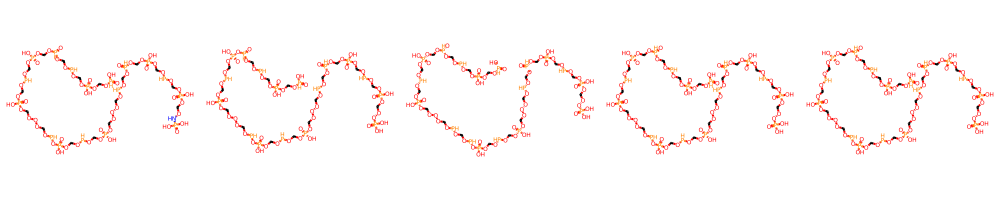

Generation 1


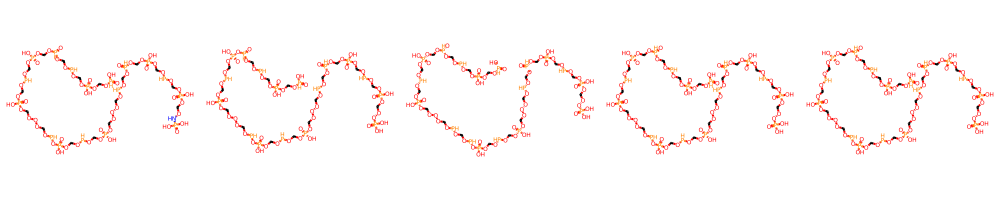

Generation 2


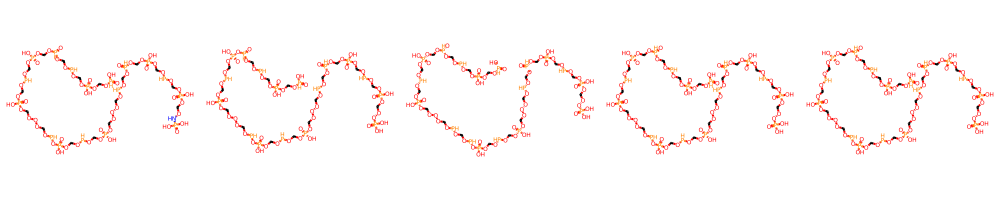

Generation 3


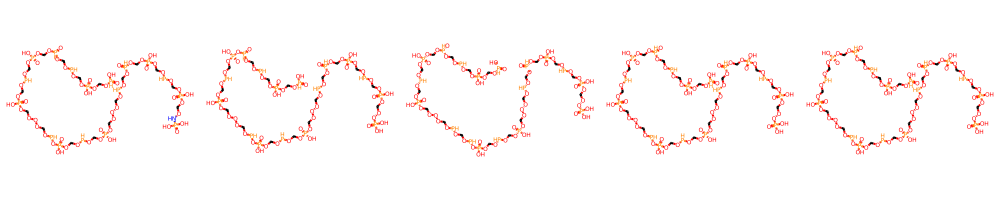

Generation 4


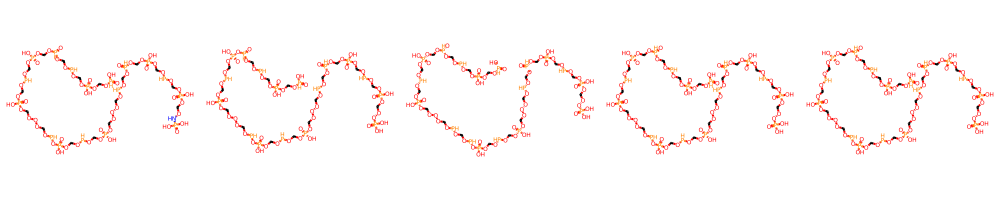

Generation 5


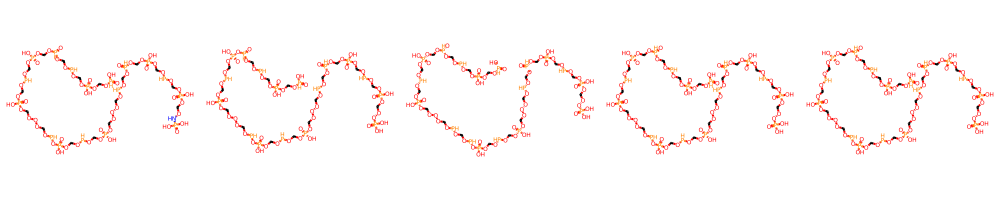

Generation 6


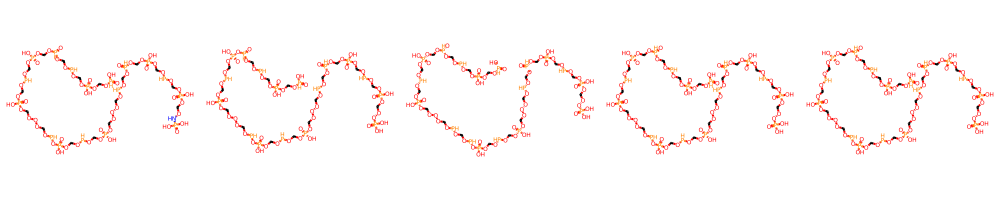

Generation 7


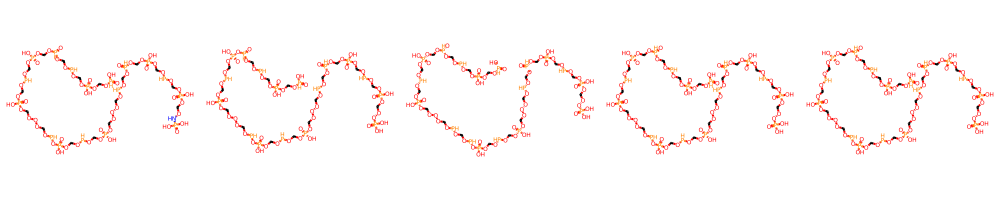

Generation 8


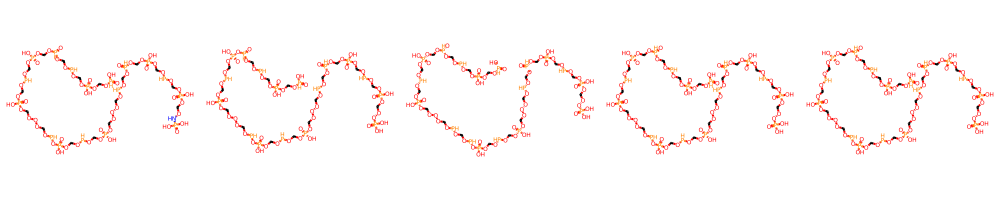

Generation 9


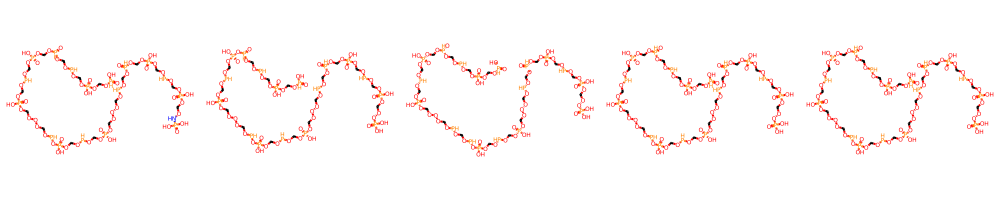

Generation 10


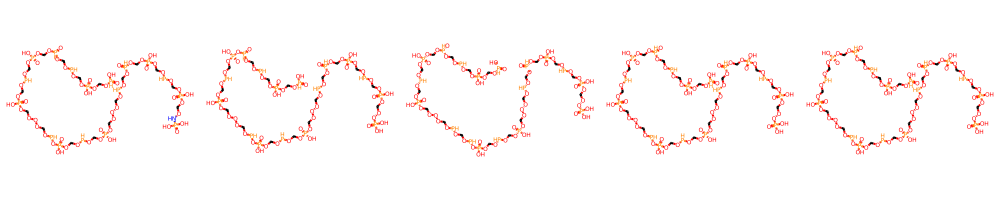

Generation 11


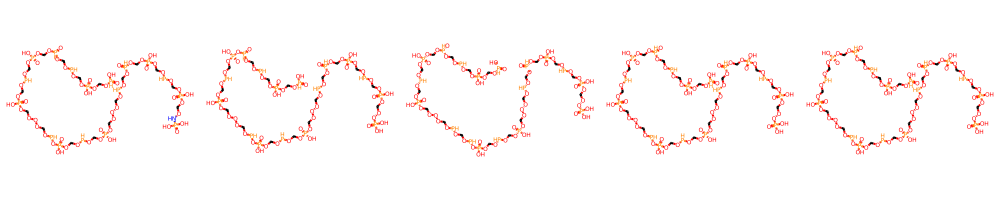

Generation 12


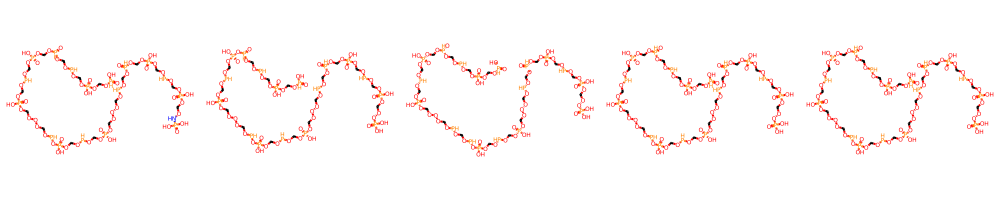

Generation 13


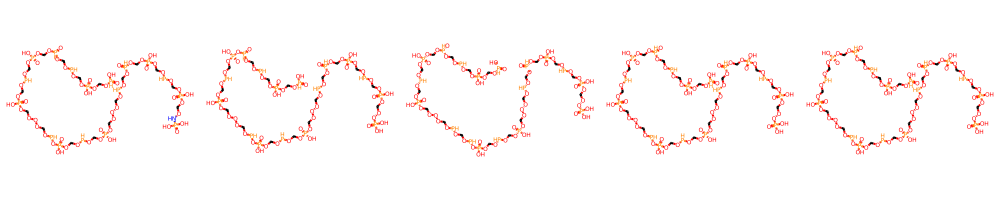

Generation 14


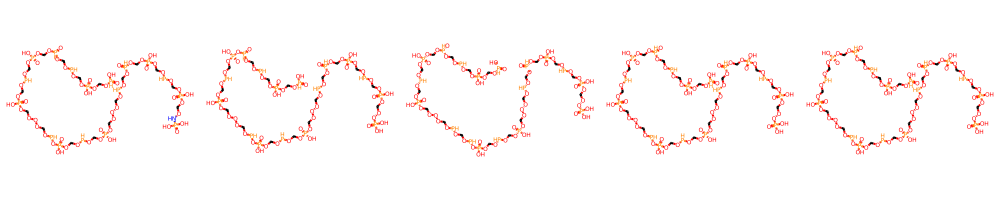

Generation 15


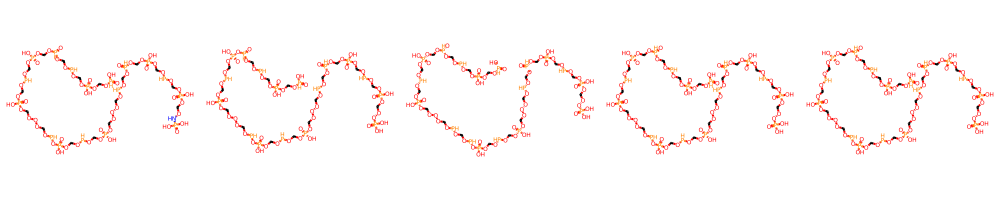

Generation 16


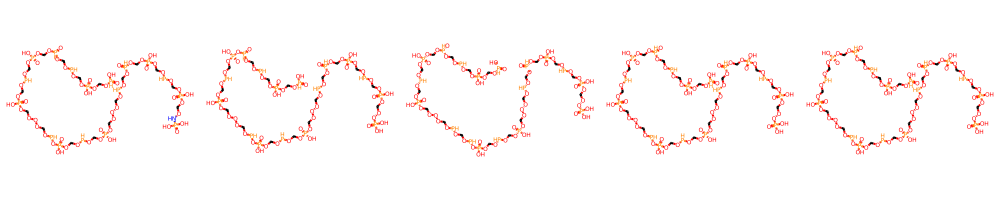

Generation 17


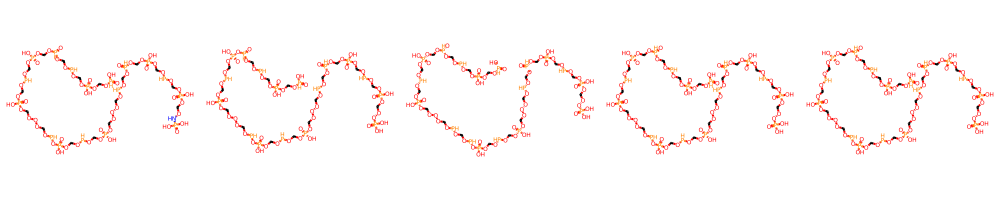

Generation 18


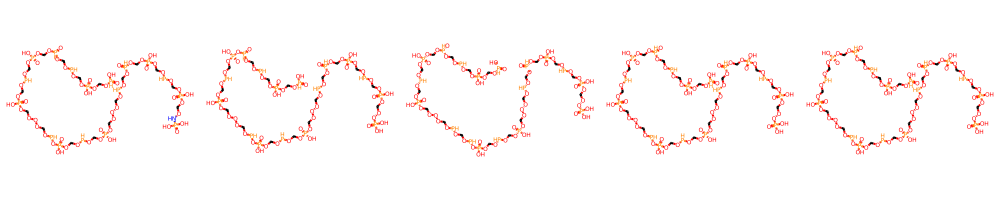

Generation 19


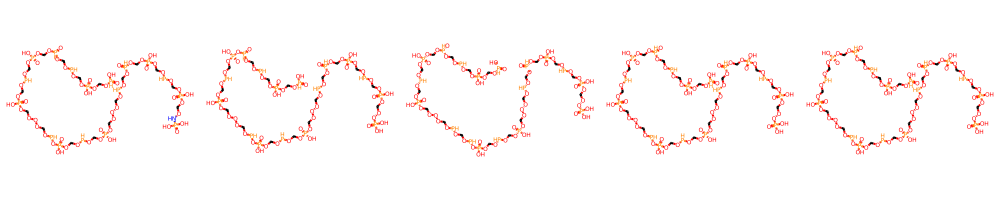

Generation 20


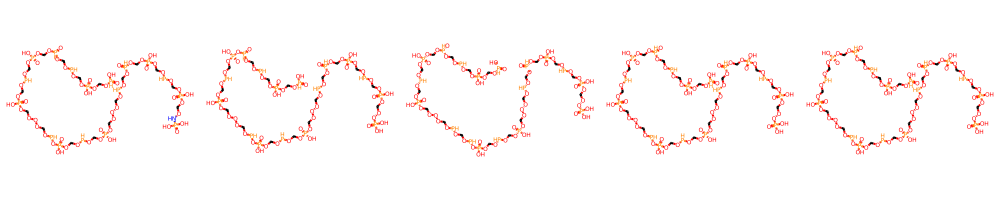

Generation 21


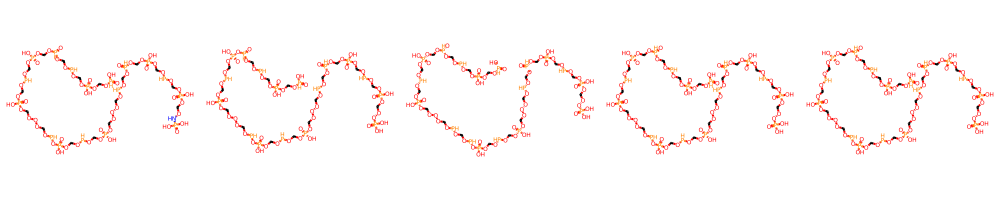

Generation 22


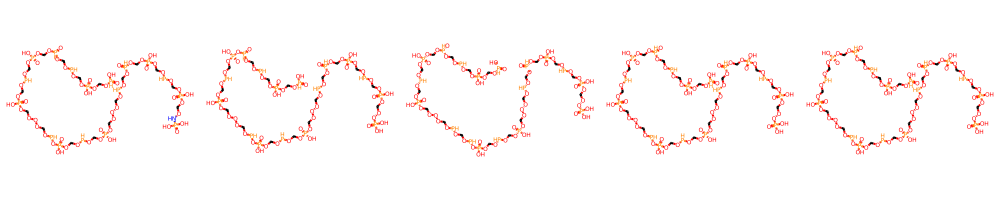

Generation 23


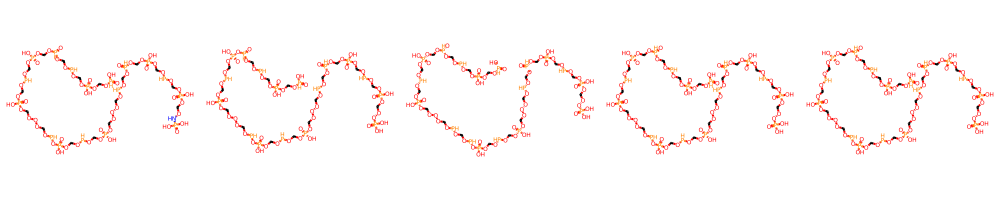

Generation 24


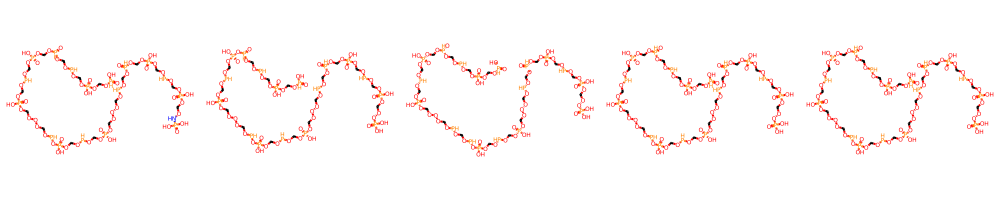

Generation 25


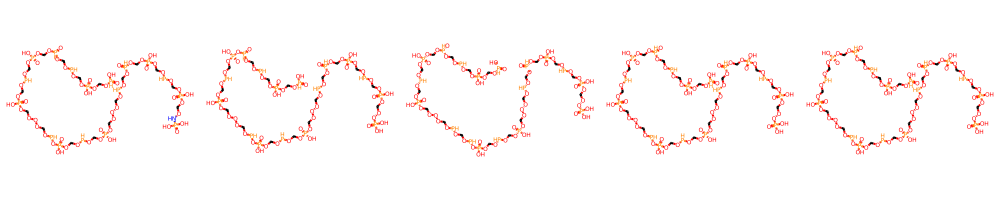

Generation 26


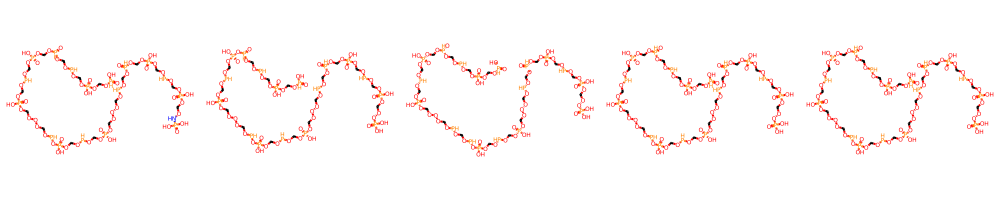

Generation 27


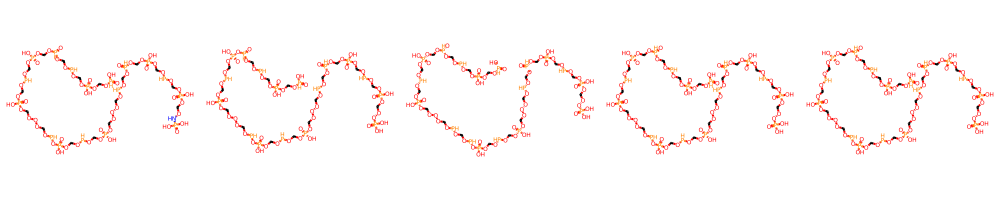

Generation 28


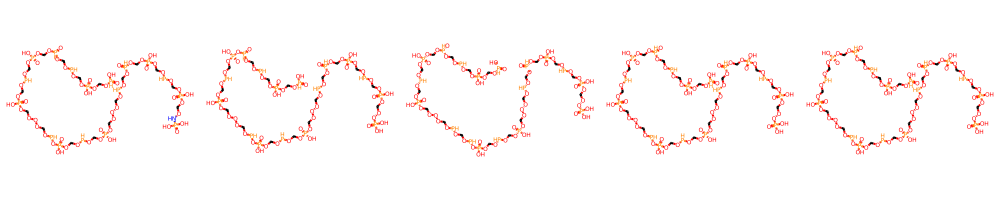

Generation 29


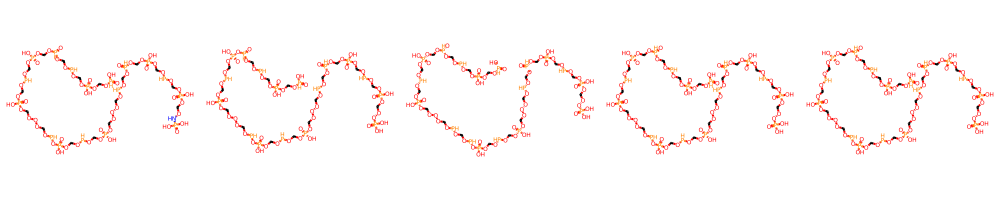

Generation 30


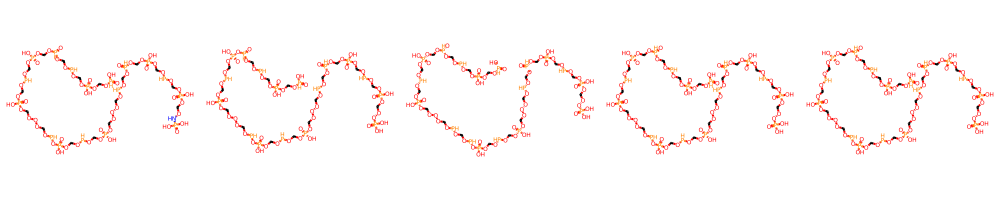

Generation 31


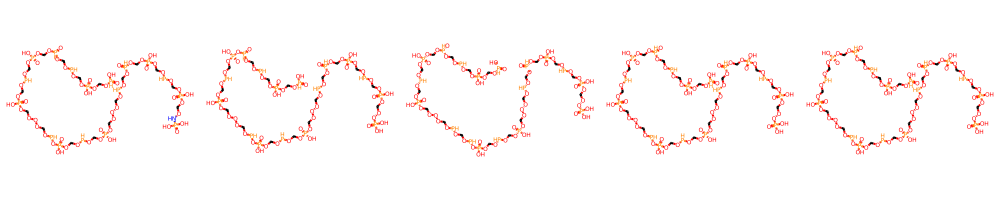

Generation 32


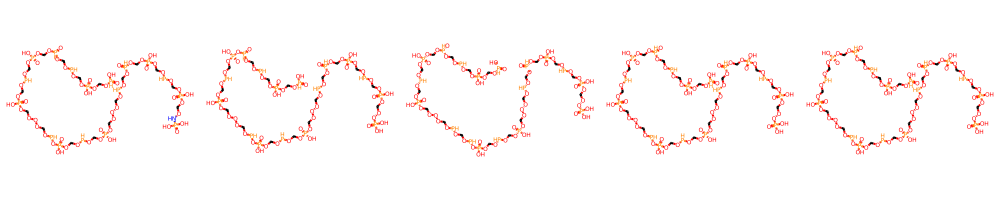

Generation 33


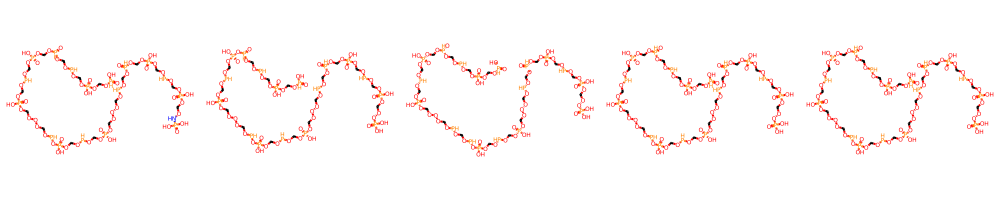

Generation 34


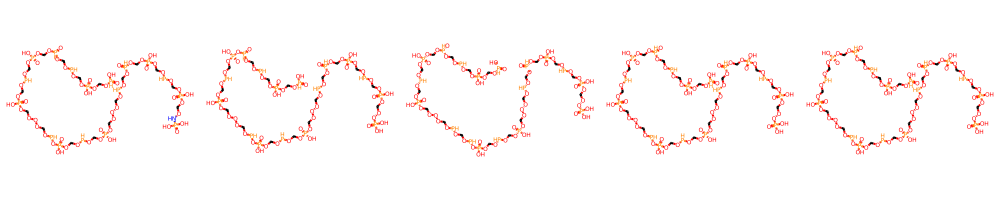

Generation 35


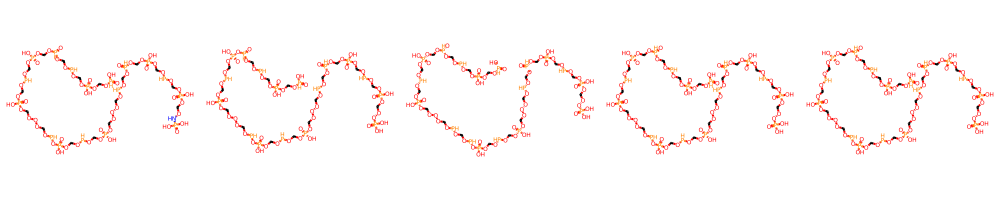

Generation 36


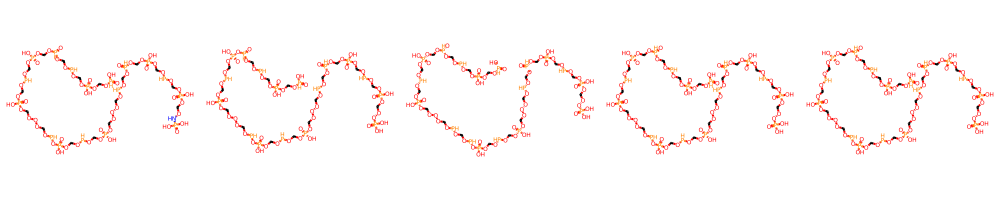

Generation 37


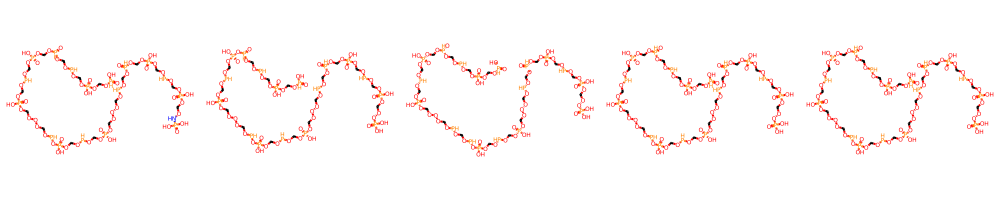

Generation 38


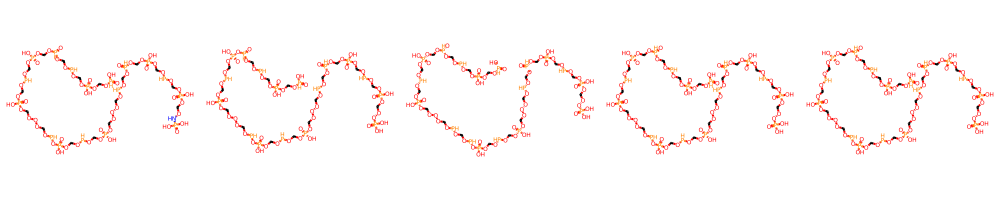

Generation 39


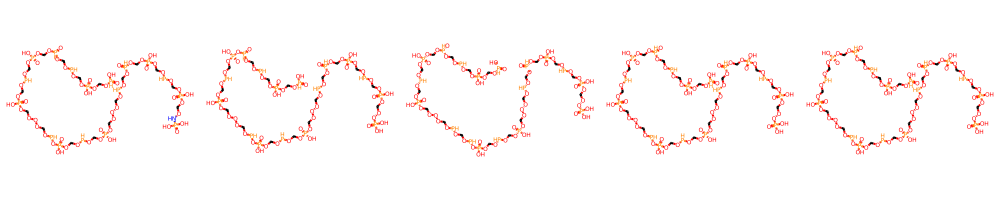

Generation 40


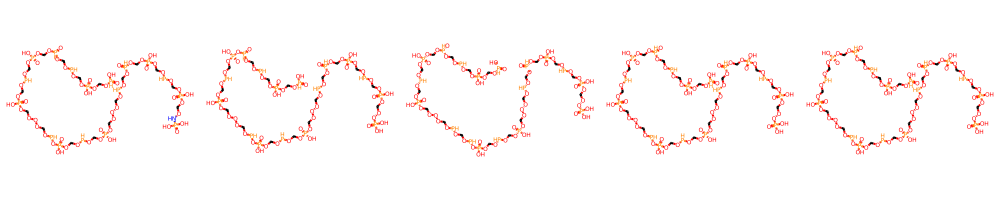

Generation 41


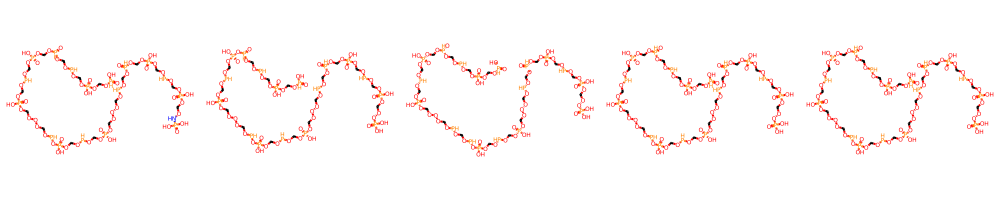

Generation 42


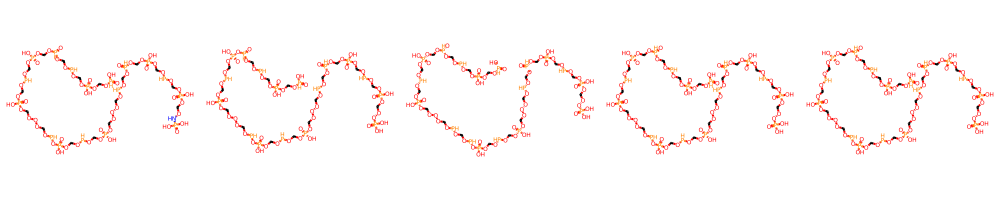

Generation 43


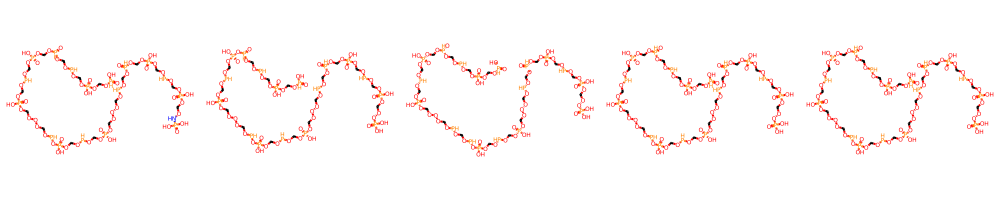

Generation 44


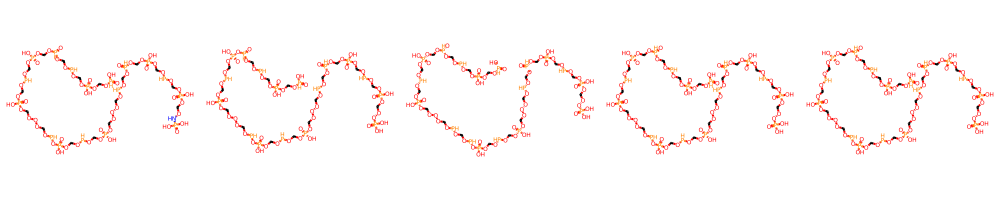

Generation 45


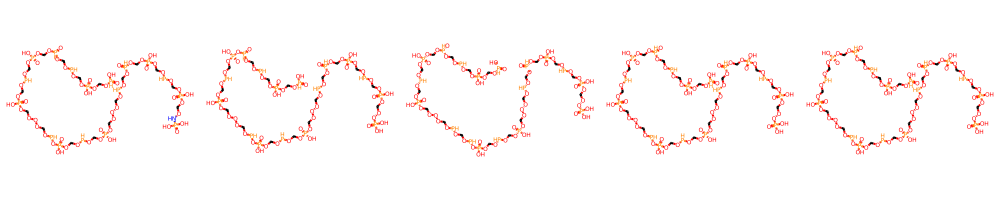

Generation 46


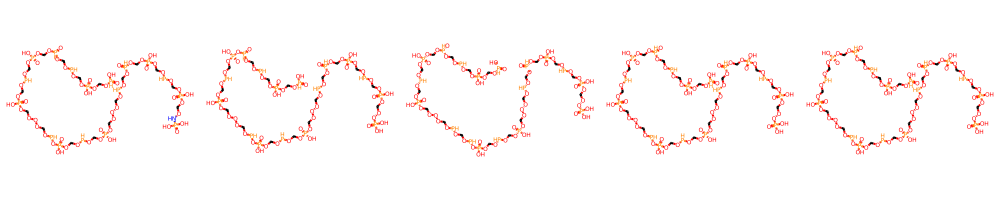

Generation 47


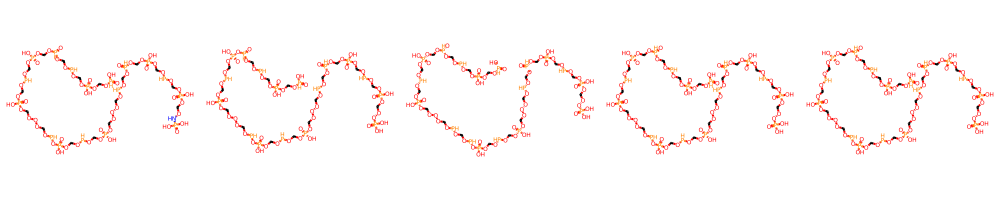

Generation 48


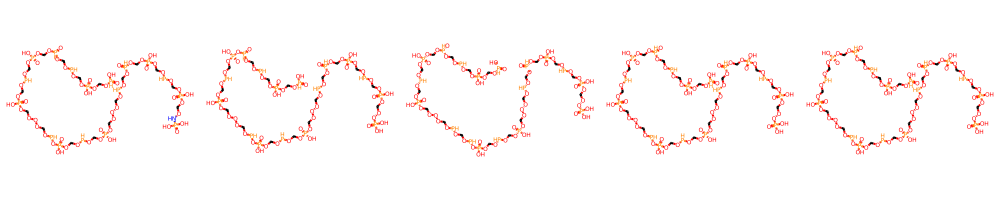

Generation 49


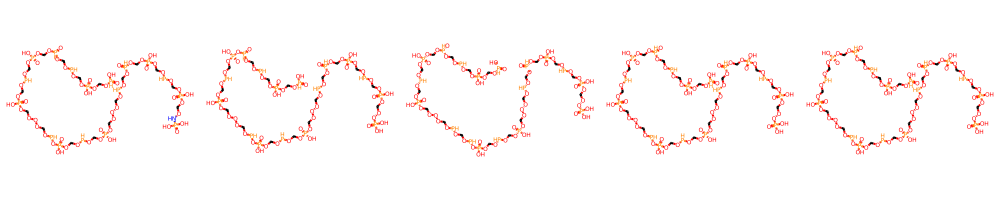

Generation 50


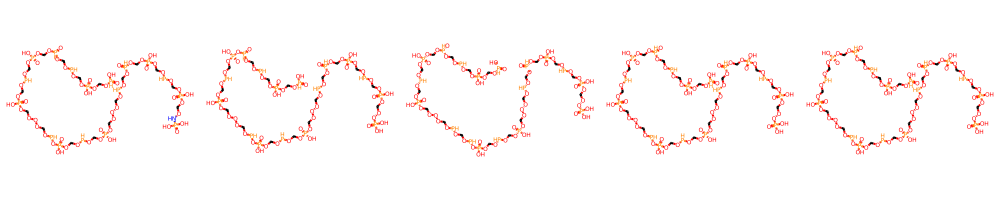

Generation 51


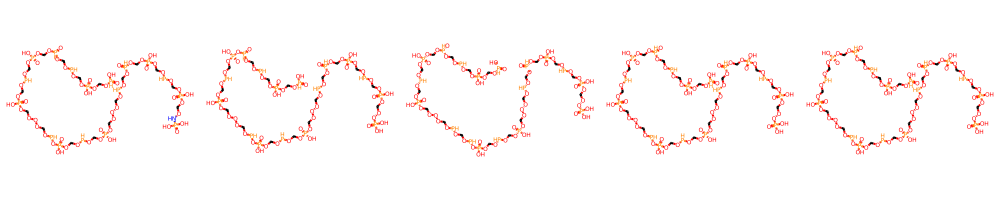

Generation 52


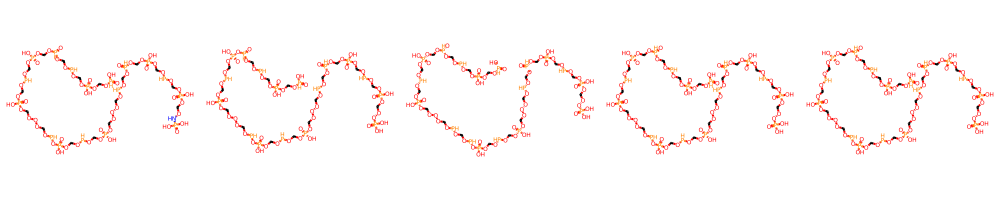

Generation 53


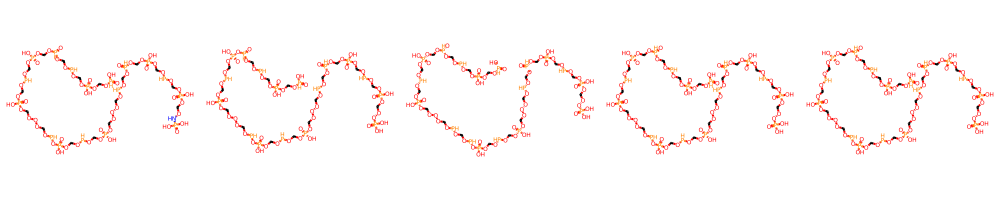

Generation 54


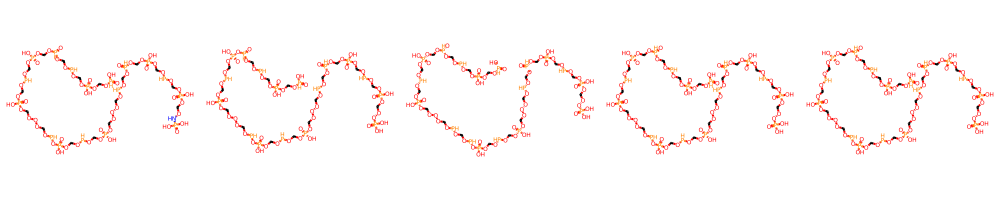

Generation 55


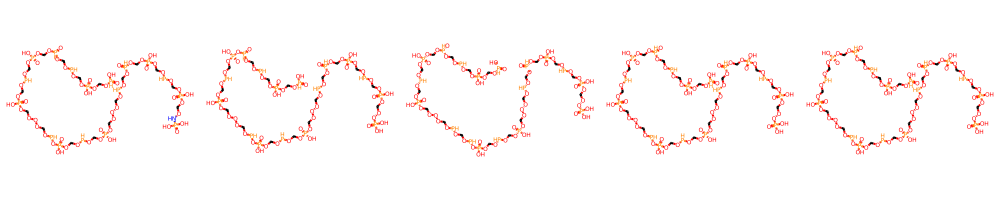

Generation 56


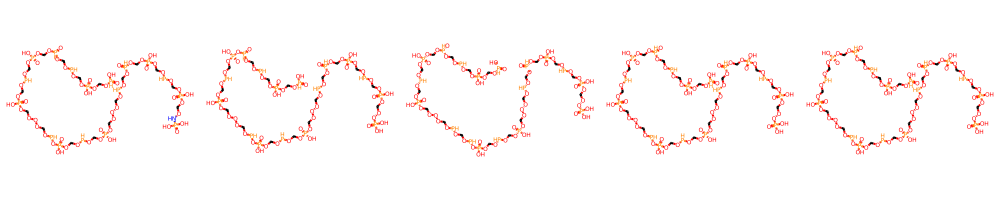

Generation 57


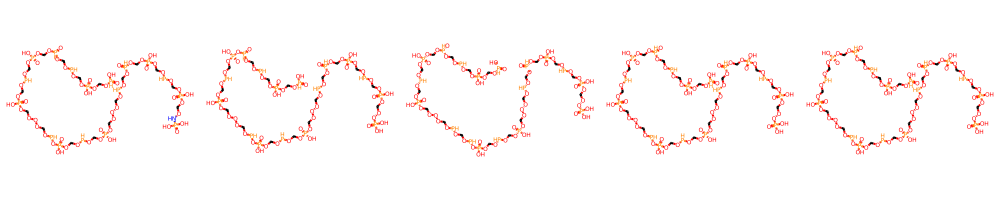

Generation 58


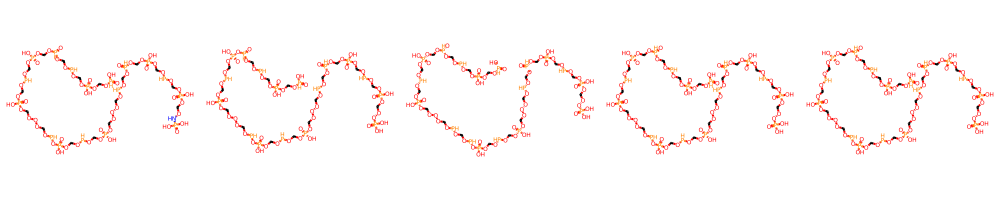

Generation 59


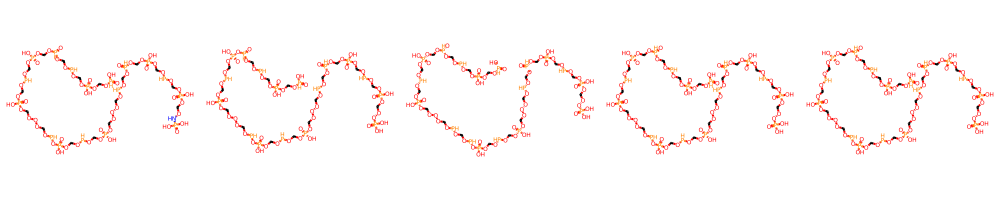

Generation 60


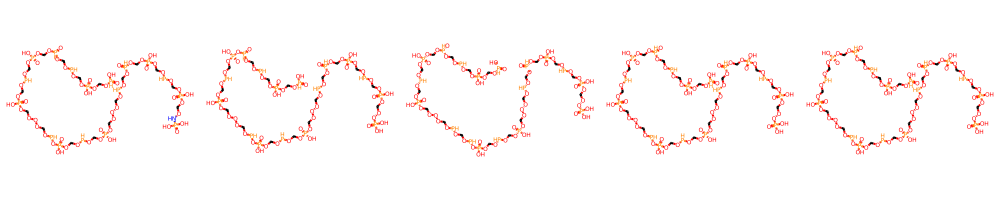

Generation 61


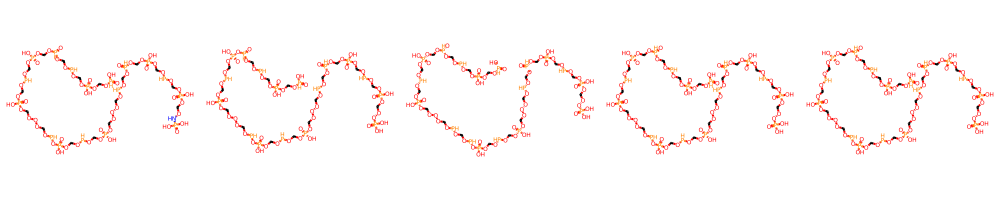

Generation 62


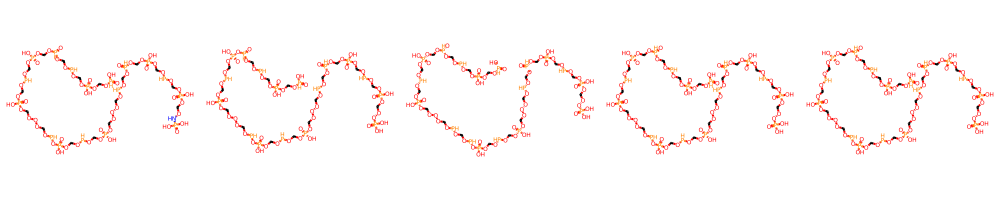

Generation 63


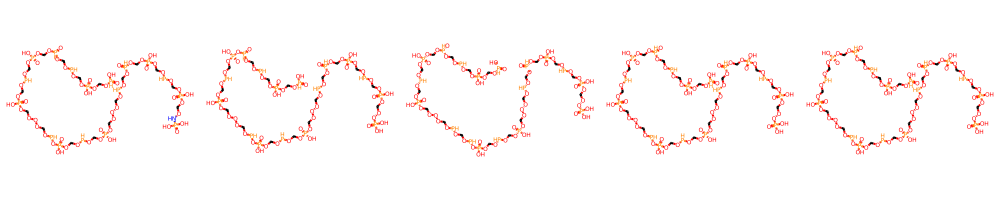

Generation 64


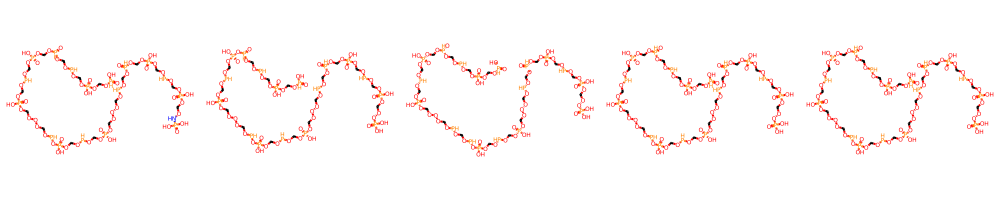

Generation 65


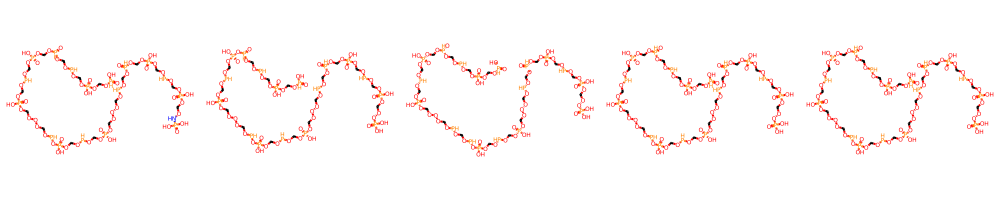

Generation 66


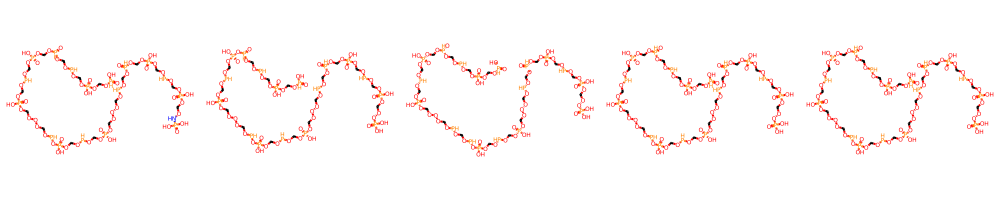

Generation 67


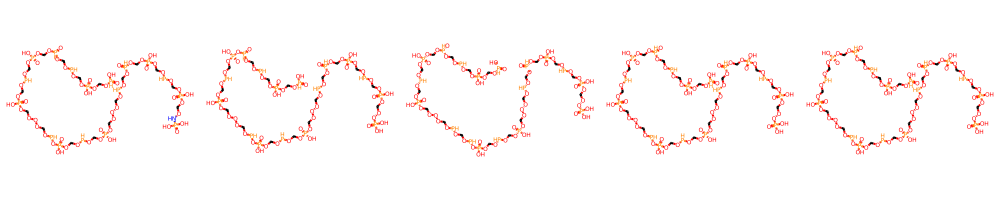

Generation 68


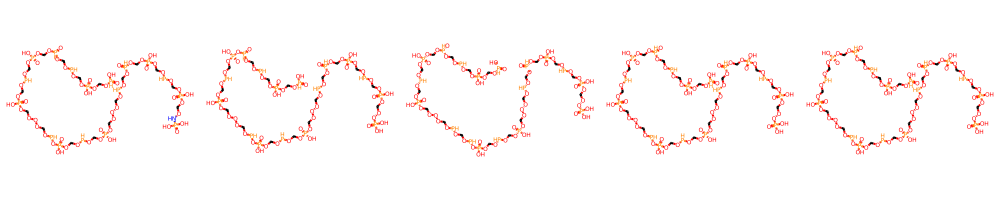

Generation 69


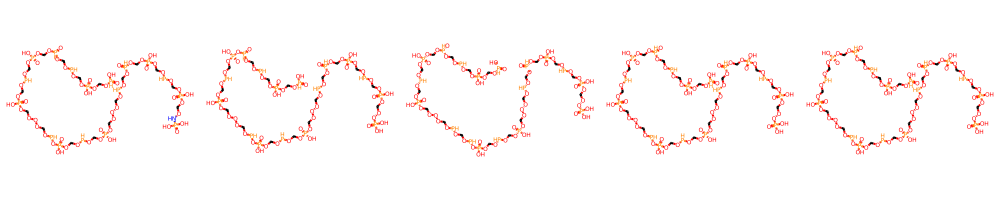

Generation 70


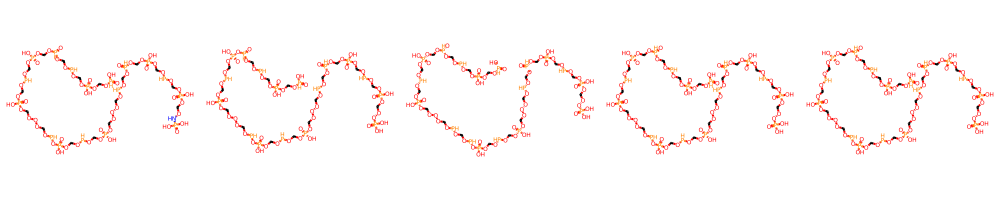

Generation 71


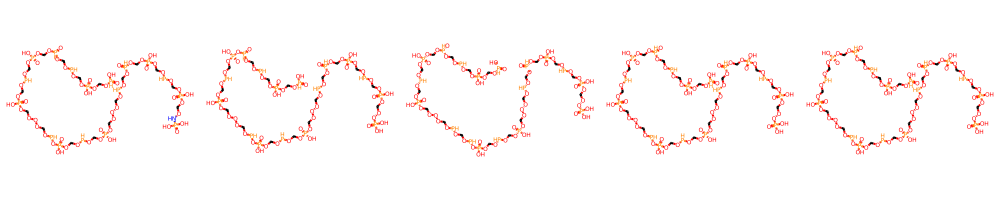

Generation 72


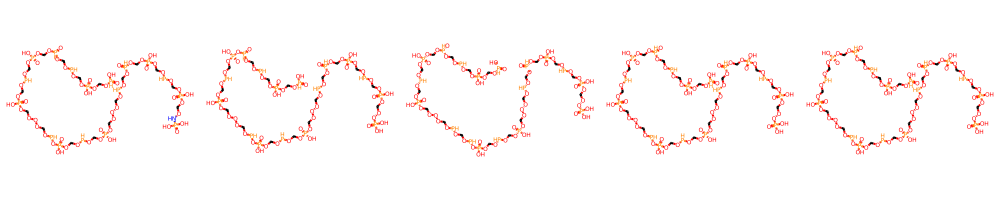

Generation 73


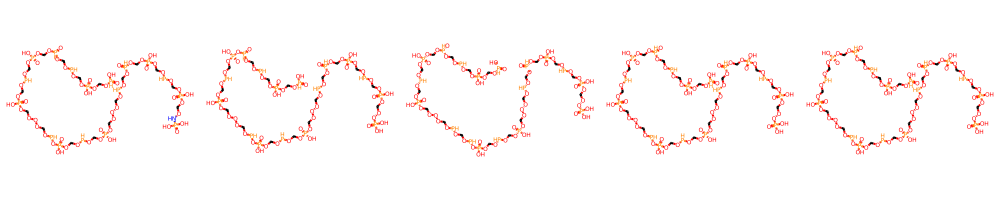

Generation 74


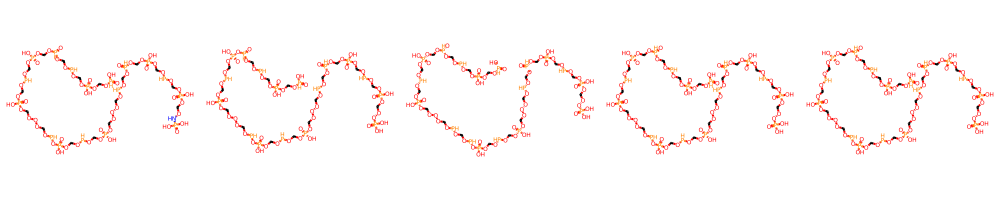

Generation 75


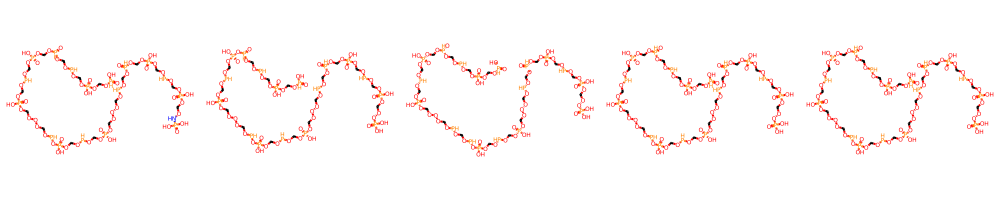

Generation 76


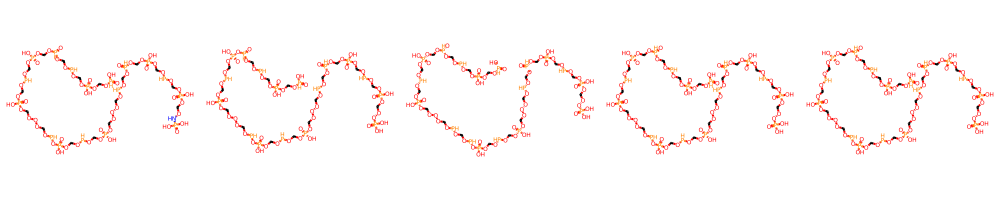

Generation 77


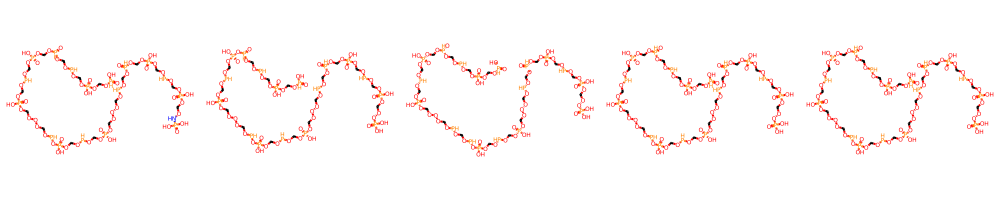

Generation 78


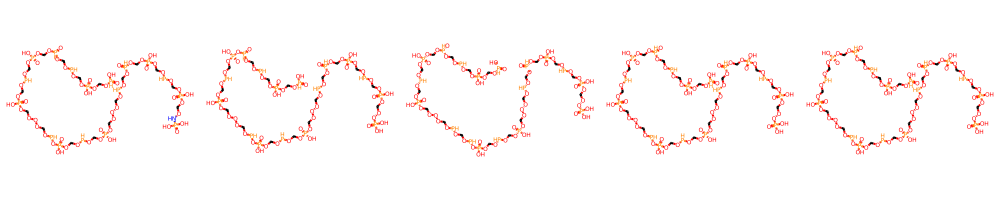

Generation 79


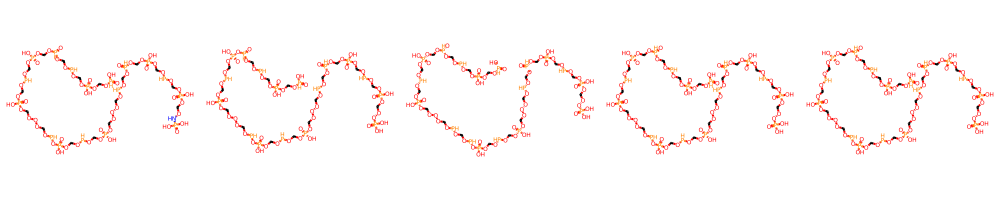

Generation 80


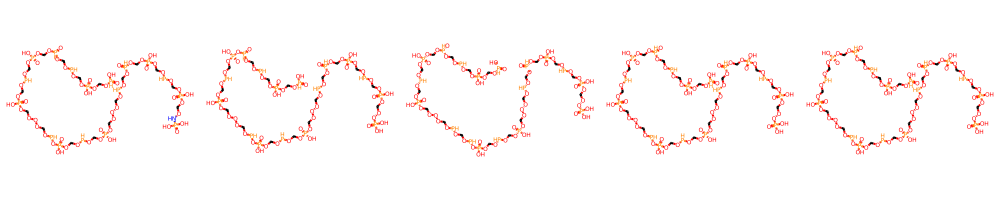

Generation 81


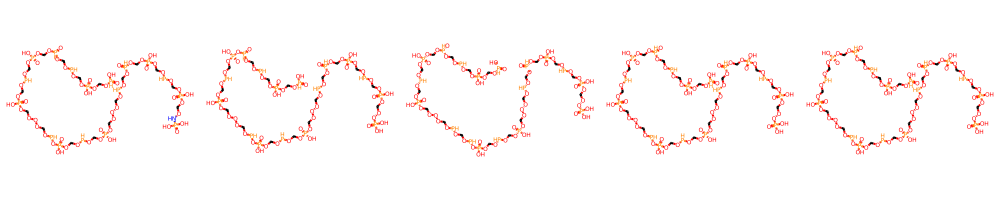

Generation 82


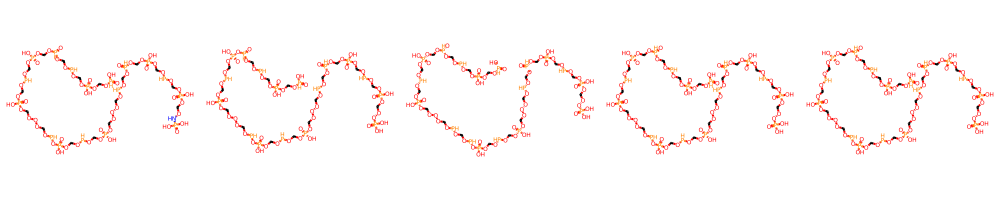

Generation 83


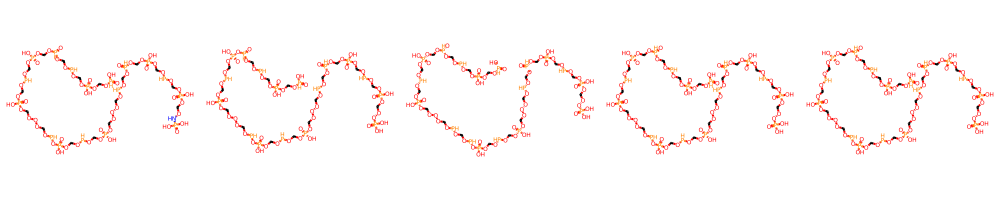

Generation 84


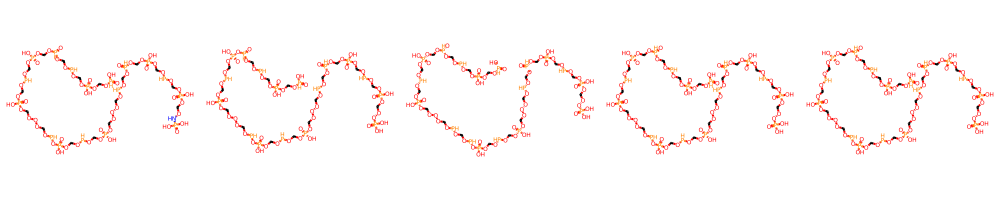

Generation 85


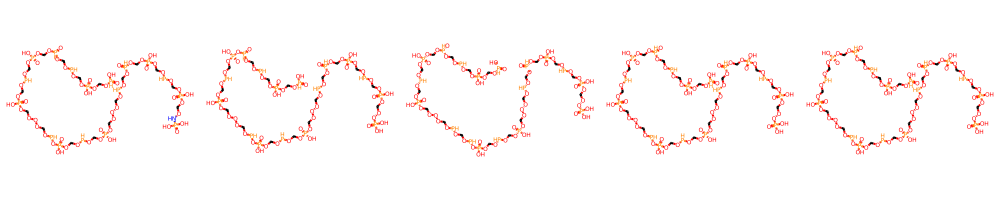

Generation 86


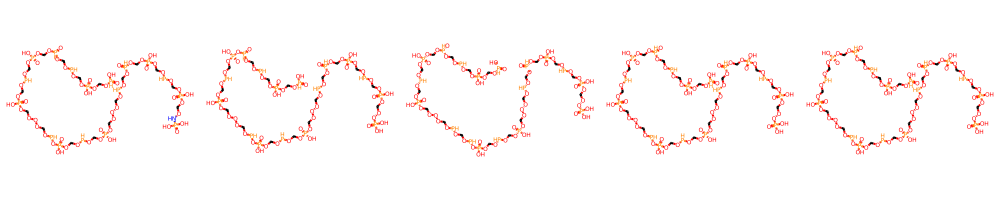

Generation 87


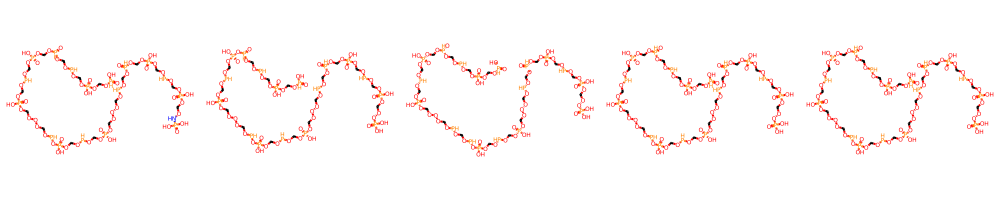

Generation 88


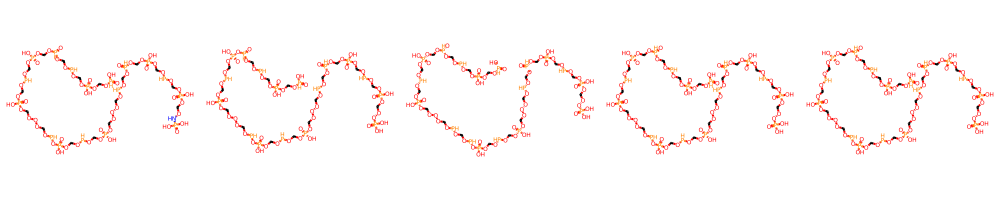

Generation 89


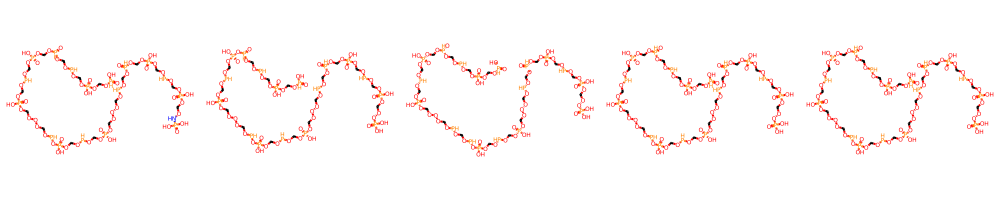

Generation 90


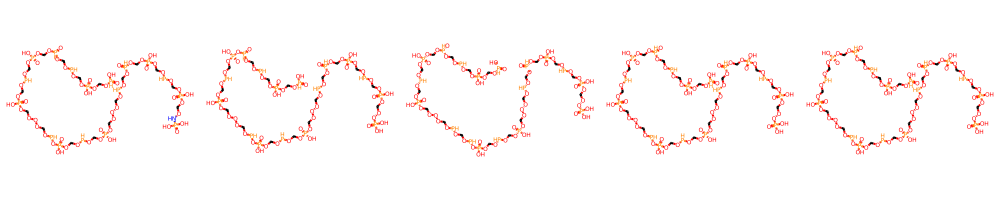

Generation 91


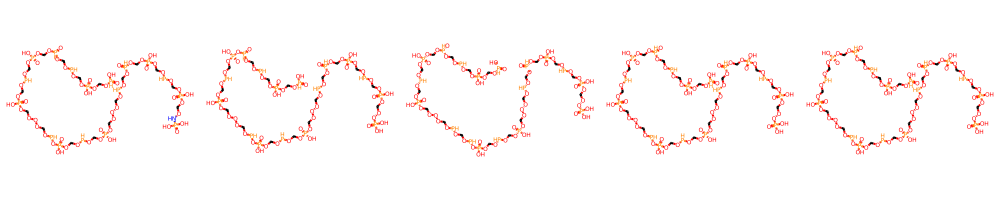

Generation 92


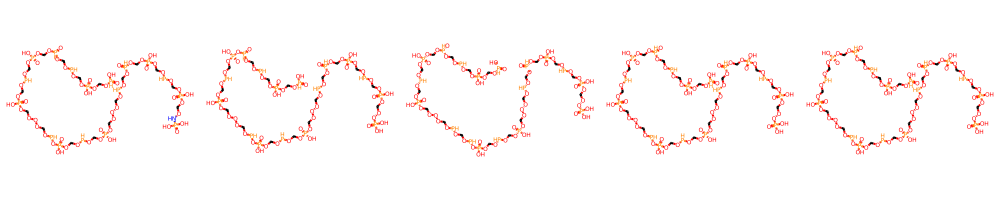

Generation 93


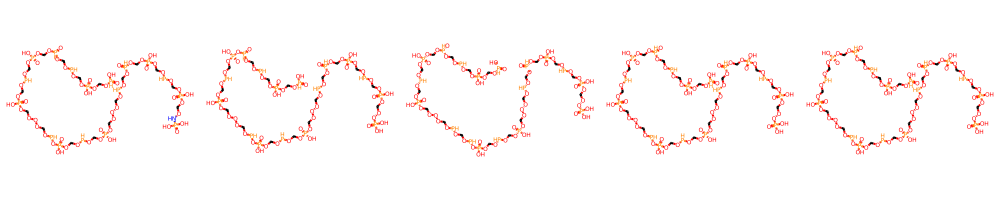

Generation 94


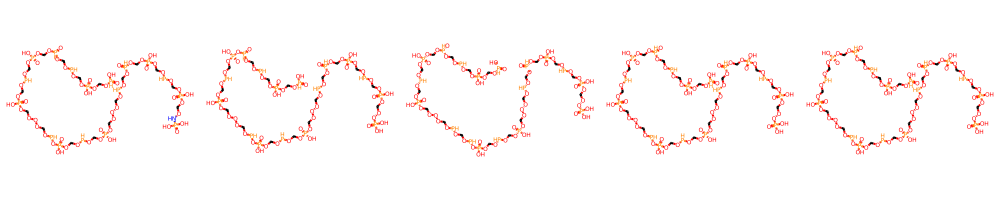

Generation 95


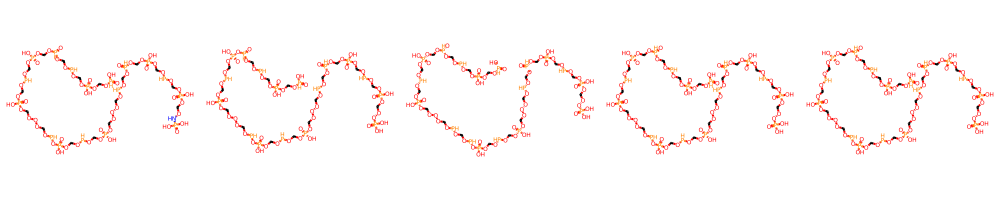

Generation 96


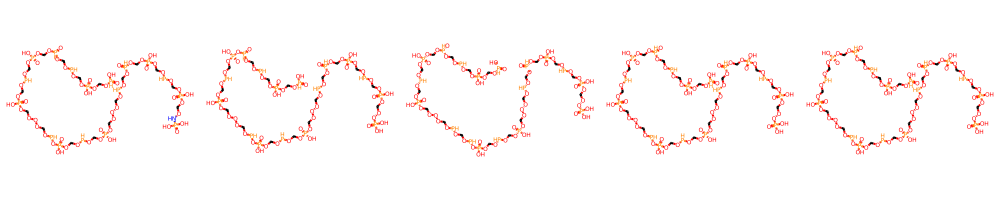

Generation 97


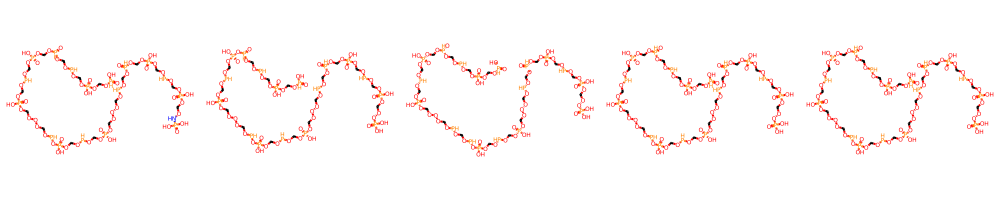

Generation 98


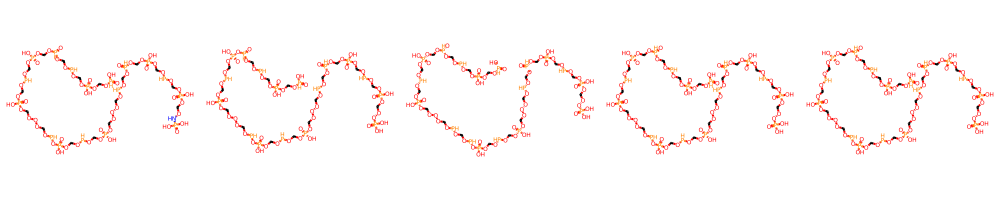

Generation 99


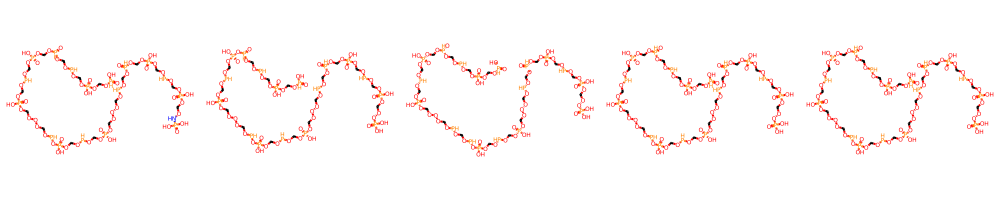

In [8]:
from src.view.viewer import population_grid
from IPython.display import display

for gen, p in enumerate(history):
    print(f"Generation {gen}")
    display(population_grid(p, n=6))

# Plot Mean Fitness Over Time

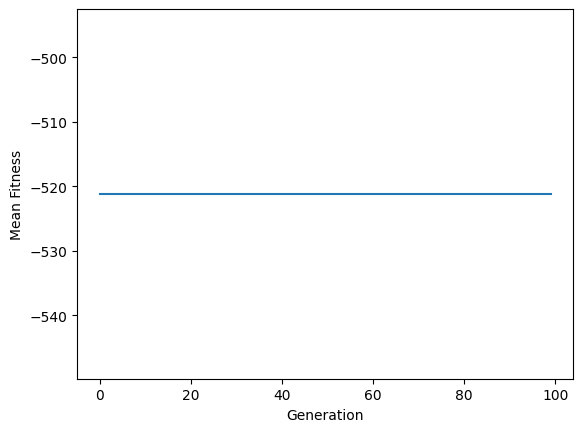

In [9]:
from src.view.plots import plot_fitness_over_time
plot_fitness_over_time(history)

# GIF?

In [10]:
import imageio
from rdkit.Chem.Draw import MolToImage
imgs = []

for p in history:
    best = min(p.molecules, key=lambda m: p.fitness[m])
    img = MolToImage(best.rdkit_mol, size=(300, 300))
    imgs.append(img)

imageio.mimsave("best_molecules.gif", imgs, duration=0.5)